#San Francisco Crime Classification

In [1]:
import pandas as pd
import numpy as np
import math
import zipfile
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
def llfun(act, pred):
    """ Logloss function for 1/0 probability
    """
    return (-(~(act == pred)).astype(int) * math.log(1e-15)).sum() / len(act)

In [6]:
z = zipfile.ZipFile('train.csv.zip')
train = pd.read_csv(z.open('train.csv'), parse_dates=['Dates'])[['X', 'Y', 'Category']]

In [7]:
print train.describe()
print train.head()

                   X              Y
count  878049.000000  878049.000000
mean     -122.422616      37.771020
std         0.030354       0.456893
min      -122.513642      37.707879
25%      -122.432952      37.752427
50%      -122.416420      37.775421
75%      -122.406959      37.784369
max      -120.500000      90.000000
            X          Y        Category
0 -122.425892  37.774599        WARRANTS
1 -122.425892  37.774599  OTHER OFFENSES
2 -122.424363  37.800414  OTHER OFFENSES
3 -122.426995  37.800873   LARCENY/THEFT
4 -122.438738  37.771541   LARCENY/THEFT


In [15]:
# Separate test and train set out of orignal train set.
msk = np.random.rand(len(train)) < 0.8

knn_train = train[msk]
knn_test = train[~msk]
n = len(knn_test)

print("Original size: %s" % len(train))
print("Train set: %s" % len(knn_train))
print("Test set: %s" % len(knn_test))

Original size: 878049
Train set: 701866
Test set: 176183


In [16]:
# Prepare data sets
x = knn_train[['X', 'Y']]
y = knn_train['Category'].astype('category')
actual = knn_test['Category'].astype('category')

In [17]:
# Fit
logloss = []
for i in range(1, 50, 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x, y)
    
    # Predict on test set
    outcome = knn.predict(knn_test[['X', 'Y']])
    
    # Logloss
    logloss.append(llfun(actual, outcome))

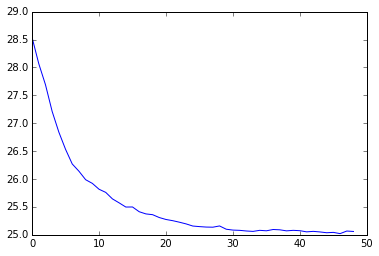

In [20]:
plt.plot(logloss)
plt.plot()
#plt.savefig('n_neighbors_vs_logloss.png')

In [21]:
# Submit for K=40
z = zipfile.ZipFile('test.csv.zip')
test = pd.read_csv(z.open('test.csv'), parse_dates=['Dates'])
x_test = test[['X', 'Y']]
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x, y)
outcomes = knn.predict(x_test)

In [22]:
submit = pd.DataFrame({'Id': test.Id.tolist()})
for category in y.cat.categories:
    submit[category] = np.where(outcomes == category, 1, 0)
    
submit.to_csv('k_nearest_neigbour.csv', index = False)